In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('./Dataset/Churn_Modelling.csv')

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df = df.drop_duplicates()

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = df.iloc[:, 3:-2]
y = df.iloc[:, -1]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1


<Axes: xlabel='HasCrCard'>

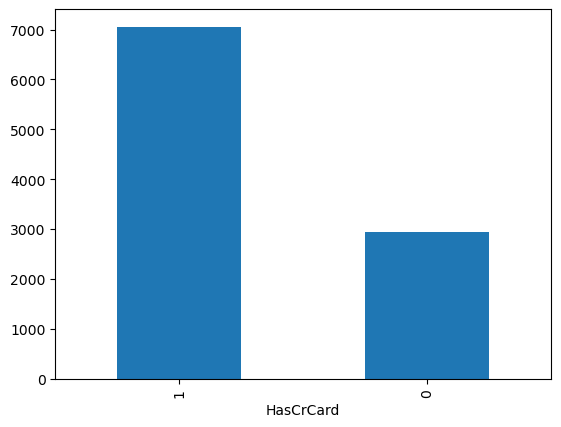

In [8]:
X['HasCrCard'].value_counts().plot(kind = 'bar')

Exited
0    7963
1    2037
Name: count, dtype: int64


<Axes: xlabel='Exited'>

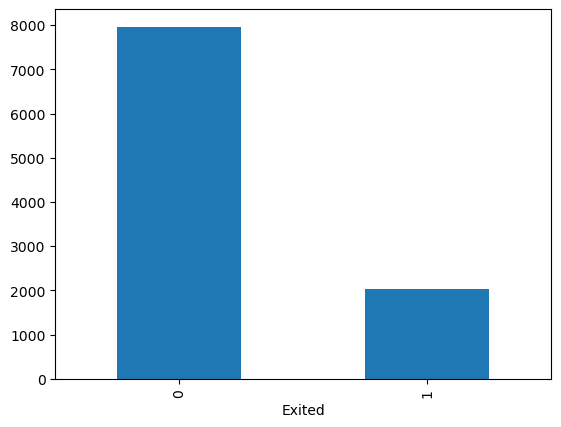

In [9]:
print(y.value_counts())
y.value_counts().plot(kind = 'bar') # Class imbalance

In [10]:
mean_balance = X.loc[X['Balance'] != 0.0, 'Balance'].mean()
X.loc[X['Balance'] == 0.0, 'Balance'] = mean_balance

In [11]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,119827.493793,1,1,1
1,608,Spain,Female,41,1,83807.860000,1,0,1
2,502,France,Female,42,8,159660.800000,3,1,0
3,699,France,Female,39,1,119827.493793,2,0,0
4,850,Spain,Female,43,2,125510.820000,1,1,1
...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,119827.493793,2,1,0
9996,516,France,Male,35,10,57369.610000,1,1,1
9997,709,France,Female,36,7,119827.493793,1,0,1
9998,772,Germany,Male,42,3,75075.310000,2,1,0


In [12]:
# Splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
X['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [14]:
ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(), ['Geography', 'Gender'])
    ],
    remainder='passthrough'
)
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [15]:
sm = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [17]:
# Logistic Regression (79.83582089552239)

params = {
  'C': [0.01, 0.1, 1]
}

lr_model = LogisticRegression()
grid_search = GridSearchCV(lr_model, param_grid=params, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'C': 0.1}
Best Score: 0.7983582089552239
Accuracy of the best model: 0.7942424242424242
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      2657
           1       0.40      0.12      0.18       643

    accuracy                           0.79      3300
   macro avg       0.61      0.54      0.53      3300
weighted avg       0.74      0.79      0.75      3300



c:\Users\anura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Decision Trees (87.5757575757575)

param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_model = DecisionTreeClassifier()
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_dt_model = grid_search.best_estimator_

y_pred = best_dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)
print(classification_report(y_test, y_pred))

print("Best hyperparameters:", grid_search.best_params_)

Accuracy of the best model: 0.8375757575757575
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2657
           1       0.59      0.53      0.56       643

    accuracy                           0.84      3300
   macro avg       0.74      0.72      0.73      3300
weighted avg       0.83      0.84      0.83      3300

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [16]:
# SVC (74.75757575757576)
params = {
    'C': 1,
    'kernel': 'rbf'
}

best_svm_model = SVC(**params)

best_svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best SVC model:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy of the best SVC model: 0.7475757575757576
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2657
           1       0.24      0.13      0.17       643

    accuracy                           0.75      3300
   macro avg       0.52      0.51      0.51      3300
weighted avg       0.70      0.75      0.72      3300



In [17]:
# Random Forest (86.45454545454545)
params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

best_rf_model = RandomForestClassifier(**params)
best_rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best Random Forest model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the best Random Forest model: 0.8645454545454545
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.71      0.52      0.60       643

    accuracy                           0.86      3300
   macro avg       0.80      0.73      0.76      3300
weighted avg       0.86      0.86      0.86      3300



In [16]:
# Gradient Boosting (86.84848484848485)
params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

gb_model = GradientBoostingClassifier(**params)
gb_model.fit(X_train_resampled, y_train_resampled)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best Gradient Boosting model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the best Gradient Boosting model: 0.8684848484848485
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2657
           1       0.71      0.54      0.62       643

    accuracy                           0.87      3300
   macro avg       0.80      0.75      0.77      3300
weighted avg       0.86      0.87      0.86      3300



In [20]:
# XGBoost (86.6969696969697)
params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 0.1
}

xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best XGBoost model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the best XGBoost model: 0.866969696969697
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2657
           1       0.71      0.53      0.61       643

    accuracy                           0.87      3300
   macro avg       0.80      0.74      0.76      3300
weighted avg       0.86      0.87      0.86      3300



In [21]:
# Voting Ensemble (87.03030303030304)
dt_params = {
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

rf_params = {
    'n_estimators': 200,
    'max_depth': 10,
    'min_samples_split': 5,
    'min_samples_leaf': 1
}

gb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_samples_split': 2,
    'min_samples_leaf': 1
}

xgb_params = {
    'n_estimators': 200,
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 0.1
}

dt_model = DecisionTreeClassifier(**dt_params)
rf_model = RandomForestClassifier(**rf_params)
gb_model = GradientBoostingClassifier(**gb_params)
xgb_model = XGBClassifier(**xgb_params)

vc_model = VotingClassifier(estimators=[
    ('dt', dt_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
])

vc_model.fit(X_train_resampled, y_train_resampled)
y_pred = vc_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Voting Ensemble model:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the Voting Ensemble model: 0.8703030303030304
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2657
           1       0.75      0.50      0.60       643

    accuracy                           0.87      3300
   macro avg       0.82      0.73      0.76      3300
weighted avg       0.86      0.87      0.86      3300



In [19]:
# Bagging Ensemble (85.54545454545455)

dt_model = DecisionTreeClassifier(**dt_params)
bagging_model = BaggingClassifier(estimator=dt_model, n_estimators=10, random_state=42)

bagging_model.fit(X_train_resampled, y_train_resampled)
y_pred = bagging_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Bagging Ensemble model with Decision Trees:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy of the Bagging Ensemble model with Decision Trees: 0.8554545454545455
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2657
           1       0.66      0.54      0.59       643

    accuracy                           0.86      3300
   macro avg       0.78      0.74      0.75      3300
weighted avg       0.85      0.86      0.85      3300

